In [143]:
import pandas as pd

In [173]:
dataFrame=pd.read_excel("bisiklet_fiyatlari.xlsx")

In [174]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [146]:
import seaborn as sbn
import matplotlib.pyplot as plt

/Users/zeynepsudeozturk/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


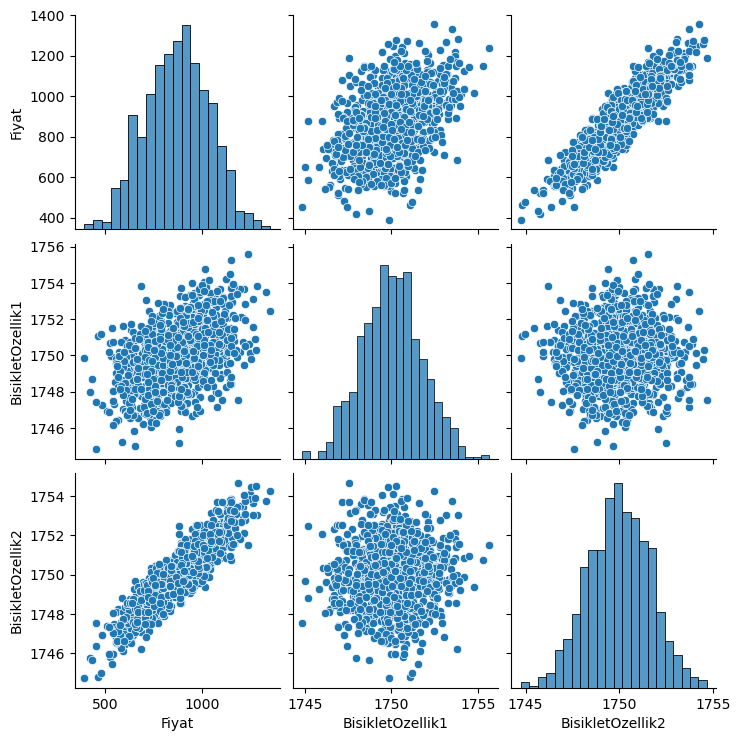

In [147]:
sbn.pairplot(dataFrame)

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
y = dataFrame["Fiyat"].values
## y = wx+b
## y-> label (gitmek istediğimiz nokta yani fiyat) (bağımlı değişken)
# x-> feature (özellik) (bağımsız değişken)
# .values numpy dizisi haline getirdi , values demezsek pandas serisi olurdu

In [150]:
print(y)

[ 807.6738764  959.2275201  718.0200329  945.6688847  955.5429676
  950.2214253  972.0999123  730.7470179  653.0064296 1108.363012
 1092.432411   831.9017301 1050.644778   932.4576656  827.4618849
  886.0465092  889.7252105 1068.296866   566.4010835  780.8715318
  633.7147302  758.4686205  983.5045088 1115.291836   914.9140132
  822.1549425  950.4423736  989.5097974  927.5574942 1068.515289
  844.4737208  573.2300709 1014.528968   784.7521757 1100.709911
  939.3954013  997.617767   626.1947566 1071.148623   778.1894898
 1050.207614   916.1829736  897.6624037 1076.042305   707.6178069
 1126.454907   855.674057   775.6082     900.3383662  901.043046
  568.8524138  970.6586024  789.93495   1028.438035   836.0406201
 1005.402312   960.5938984  925.2090462  775.6192584  696.2936631
  622.6418664  806.2158674  935.842904   940.8117826 1056.422331
  957.7326352  992.7900877  795.0757731  862.0579003 1125.487881
  835.5034035  870.4719071  978.3266243 1009.187267   511.3356169
  950.2419499  9

In [151]:
x = dataFrame[["BisikletOzellik1" , "BisikletOzellik2"]].values

In [152]:
print(x)

[[1749.628226 1749.590668]
 [1748.007826 1751.824206]
 [1750.122967 1747.977026]
 ...
 [1752.540381 1747.98331 ]
 [1751.34929  1747.484989]
 [1748.656426 1752.539962]]


In [153]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [154]:
x_train.shape
## x tarin de kaç eleman var. ,2 de bisikletozellik1 ve bisikletozellik2 olmak üzere 2 tane özellik 
# olduğunu gösteriyor, bu bi matris yapısı


(670, 2)

In [155]:
x_test.shape


(330, 2)

In [156]:
# scaling verileri 0 ve 1 arasına getiriyoruz


In [157]:
from sklearn.preprocessing import MinMaxScaler


In [158]:
# minmaxscaler sınıfından scaler diye bi obje oluşturuyoruz:

In [159]:
scaler = MinMaxScaler()

In [160]:
scaler.fit(x_train)

MinMaxScaler()

In [161]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [162]:
import tensorflow as tf

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## model = Sequential() # -> modeli oluşturduk (sequential modelimizin sınıfı)
## model.add(Dense(nöron sayısı, aktıvasyon fonksiyonu) -> kaç tane hidden layers varsa o kadar ekliyoruz
## en sona çıktı katmanı yazılır model.add(Dense(1))

In [164]:
model = Sequential()
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="rmsprop", loss= "mse")

In [165]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 577us/step - loss: 795683.7500
Epoch 2/250
21/21 [==============================] - 0s 496us/step - loss: 795442.1875
Epoch 3/250
21/21 [==============================] - 0s 541us/step - loss: 795184.6875
Epoch 4/250
21/21 [==============================] - 0s 599us/step - loss: 794882.2500
Epoch 5/250
21/21 [==============================] - 0s 473us/step - loss: 794515.6250
Epoch 6/250
21/21 [==============================] - 0s 500us/step - loss: 794069.4375
Epoch 7/250
21/21 [==============================] - 0s 582us/step - loss: 793538.7500
Epoch 8/250
21/21 [==============================] - 0s 529us/step - loss: 792918.8750
Epoch 9/250
21/21 [==============================] - 0s 446us/step - loss: 792192.5000
Epoch 10/250
21/21 [==============================] - 0s 490us/step - loss: 791351.5625
Epoch 11/250
21/21 [==============================] - 0s 521us/step - loss: 790379.2500
Epoch 12/250
21/21 [=====================

In [166]:
loss = model.history.history["loss"] ## lossu dizi haline getirip lossa atadık

<Axes: >

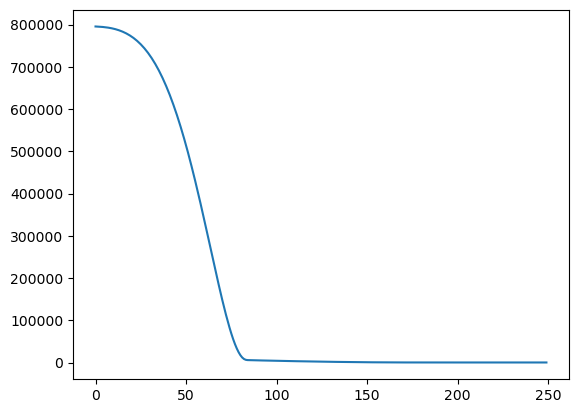

In [167]:
sbn.lineplot(x=range(len(loss)),y=loss)

# epochs veri seti üzerinden kaç kere geçileceğini belirler

In [168]:
trainLoss = model.evaluate(x_train,y_train)

21/21 [==============================] - 0s 436us/step - loss: 74.2031


In [169]:
testLoss = model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 479us/step - loss: 74.1351


In [170]:
testtahminleri = model.predict(x_test)

11/11 [==============================] - 0s 421us/step


In [171]:
testtahminleri


array([[1079.1176 ],
       [ 624.39197],
       [ 877.0901 ],
       [ 895.26294],
       [ 900.5372 ],
       [ 451.86053],
       [ 932.2184 ],
       [ 992.61475],
       [ 942.27075],
       [1017.99896],
       [ 751.7102 ],
       [ 918.9032 ],
       [ 948.62396],
       [1055.9773 ],
       [1122.8286 ],
       [ 682.2422 ],
       [1128.398  ],
       [ 651.58264],
       [1156.073  ],
       [ 887.5386 ],
       [ 893.83026],
       [ 717.4863 ],
       [ 457.14   ],
       [ 612.6074 ],
       [ 835.9101 ],
       [1092.5403 ],
       [ 714.50757],
       [ 757.68677],
       [ 874.46985],
       [ 771.44183],
       [ 451.5838 ],
       [ 783.88116],
       [ 729.03186],
       [ 647.43494],
       [ 887.73975],
       [ 844.738  ],
       [1036.9811 ],
       [1024.0542 ],
       [ 845.8563 ],
       [ 863.1936 ],
       [ 757.93146],
       [1176.0847 ],
       [1098.9683 ],
       [1089.1555 ],
       [ 874.12427],
       [ 597.15015],
       [1147.2214 ],
       [ 974.

In [176]:
tahminDf = pd.DataFrame(y_test,columns=["gerçek y"])

In [177]:
tahminDf

,gerçek y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [180]:
testtahminleri = pd.Series(testtahminleri.reshape(330,))

In [181]:
testtahminleri


0      1079.117554
1       624.391968
2       877.090088
3       895.262939
4       900.537170
          ...     
325    1014.767822
326     791.674927
327     766.758911
328    1169.055664
329     803.641724
Length: 330, dtype: float32

In [183]:
tahminDf = pd.concat([tahminDf,testtahminleri],axis=1)

In [184]:
tahminDf.columns = ["gerçek y","tahmin y"]

In [185]:
tahminDf

,gerçek y,tahmin y
0,1081.652164,1079.117554
1,622.675990,624.391968
2,889.356810,877.090088
3,902.826733,895.262939
4,897.662404,900.537170
...,...,...
325,1028.438035,1014.767822
326,789.934950,791.674927
327,758.490486,766.758911
328,1172.871659,1169.055664


<Axes: xlabel='gerçek y', ylabel='tahmin y'>

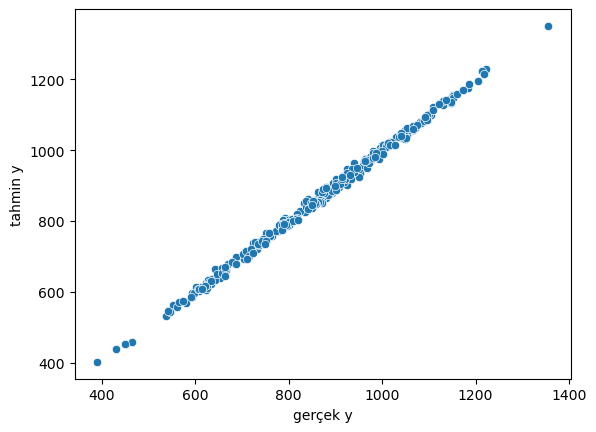

In [186]:
sbn.scatterplot(x = "gerçek y",y = "tahmin y", data = tahminDf)

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [190]:
mean_absolute_error(tahminDf["gerçek y"],tahminDf["tahmin y"])

6.895503143633992

In [191]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [192]:
yenibisikletozellikleri = [[1750,1752]] ## yeni bisikleti model nasıl tahmin ediyo ona bakcaz

In [193]:
yenibisikletozellikleri = scaler.transform(yenibisikletozellikleri)

In [194]:
model.predict(yenibisikletozellikleri)

1/1 [==============================] - 0s 67ms/step


array([[1052.6855]], dtype=float32)

## modeli kaydedip kullanmak için yapılması gerekenler:

In [200]:
from tensorflow.keras.models import load_model

In [201]:
model.save("bisikletmodeli.h5")

In [202]:
sonradancagirilanmodel = load_model("bisikletmodeli.h5")

In [203]:
sonradancagirilanmodel.predict(yenibisikletozellikleri)

1/1 [==============================] - 0s 36ms/step


array([[1052.6855]], dtype=float32)